# STATS 507 - Final Project
## Data Processing + EDA

In [79]:
import os
from pathlib import Path
from PIL import Image

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sqlite3

### Basic Info about Data & Data Cleaning (if necessary)

In [ ]:
# load dataset
df = pd.read_csv("./data/cards_og.csv")

# create a clean version
df_clean = df.copy()

df.head()


,class index,filepaths,labels,card type,data set
0,0,train/ace of clubs/001.jpg,ace of clubs,ace,train
1,0,train/ace of clubs/002.jpg,ace of clubs,ace,train
2,0,train/ace of clubs/003.jpg,ace of clubs,ace,train
3,0,train/ace of clubs/004.jpg,ace of clubs,ace,train
4,0,train/ace of clubs/005.jpg,ace of clubs,ace,train


In [81]:
# rename columns
df = df.rename(columns={
    "class index": "index",
    "filepaths": "file_path",
    "labels": "label",
    "card type": "type",
    "data set": "dataset"
})

print(df.head())
print("\n", df["label"].unique())

   index                   file_path         label type dataset
0      0  train/ace of clubs/001.jpg  ace of clubs  ace   train
1      0  train/ace of clubs/002.jpg  ace of clubs  ace   train
2      0  train/ace of clubs/003.jpg  ace of clubs  ace   train
3      0  train/ace of clubs/004.jpg  ace of clubs  ace   train
4      0  train/ace of clubs/005.jpg  ace of clubs  ace   train

 ['ace of clubs' 'ace of diamonds' 'ace of hearts' 'ace of spades'
 'eight of clubs' 'eight of diamonds' 'eight of hearts' 'eight of spades'
 'five of clubs' 'five of diamonds' 'five of hearts' 'five of spades'
 'four of clubs' 'four of diamonds' 'four of hearts' 'four of spades'
 'jack of clubs' 'jack of diamonds' 'jack of hearts' 'jack of spades'
 'joker' 'king of clubs' 'king of diamonds' 'king of hearts'
 'king of spades' 'nine of clubs' 'nine of diamonds' 'nine of hearts'
 'nine of spades' 'queen of clubs' 'queen of diamonds' 'queen of hearts'
 'queen of spades' 'seven of clubs' 'seven of diamonds' 'sev

#### Create separate columns for the Suit and Rank (change rank to be numeric)

In [82]:
# add suit & rank based on the labels
# for rank: 0 = joker, 1 = ace, 11 = jack, 12 = queen, 13 = king

rank_map = {
    "joker": 0,
    "ace": 1,
    "two": 2,
    "three": 3,
    "four": 4,
    "five": 5,
    "six": 6,
    "seven": 7,
    "eight": 8,
    "nine": 9,
    "ten": 10,
    "jack": 11,
    "queen": 12,
    "king": 13
}

def addSuitRank(label):
    s = str(label)

    words = s.split(' ')
    rank = words[0]
    suit = words[-1]

    return rank, suit

def convertRankToNumbers(rank):
    s = rank

    if s in rank_map:
        return rank_map[s]
    else: # error checking
        print(f"Unknown rank {s}. Returning None")
        return None

df["rank"], df["suit"] = zip(*df["label"].map(addSuitRank))
df["rank_num"] = df["rank"].apply(convertRankToNumbers)
print(f"Ranks: {df["rank"].unique()} \nNumeric Rank: {df["rank_num"].unique()} \nSuits: {df["suit"].unique()}")
df.head(10)

Ranks: ['ace' 'eight' 'five' 'four' 'jack' 'joker' 'king' 'nine' 'queen' 'seven'
 'six' 'ten' 'three' 'two'] 
Numeric Rank: [ 1  8  5  4 11  0 13  9 12  7  6 10  3  2] 
Suits: ['clubs' 'diamonds' 'hearts' 'spades' 'joker']


,index,file_path,label,type,dataset,rank,suit,rank_num
0,0,train/ace of clubs/001.jpg,ace of clubs,ace,train,ace,clubs,1
1,0,train/ace of clubs/002.jpg,ace of clubs,ace,train,ace,clubs,1
2,0,train/ace of clubs/003.jpg,ace of clubs,ace,train,ace,clubs,1
3,0,train/ace of clubs/004.jpg,ace of clubs,ace,train,ace,clubs,1
4,0,train/ace of clubs/005.jpg,ace of clubs,ace,train,ace,clubs,1
5,0,train/ace of clubs/006.jpg,ace of clubs,ace,train,ace,clubs,1
6,0,train/ace of clubs/007.jpg,ace of clubs,ace,train,ace,clubs,1
7,0,train/ace of clubs/008.jpg,ace of clubs,ace,train,ace,clubs,1
8,0,train/ace of clubs/009.jpg,ace of clubs,ace,train,ace,clubs,1
9,0,train/ace of clubs/010.jpg,ace of clubs,ace,train,ace,clubs,1


#### Get the Brightness of each image and create a new column

In [107]:
from tqdm import tqdm

df["file_path"] = "./data/" + df["file_path"].astype(str)
print(df["file_path"].head())

def get_brightness(path):
    try:
        with Image.open(path) as img:
            gray = img.convert("L")
            return float(np.array(gray).mean())
    except:
        return None

brightnesses = [
    get_brightness(Path(p)) 
    for p in tqdm(df["file_path"], desc="Computing brightness")
]

df["brightness"] = brightnesses


0    ./data/train/ace of clubs/001.jpg
1    ./data/train/ace of clubs/002.jpg
2    ./data/train/ace of clubs/003.jpg
3    ./data/train/ace of clubs/004.jpg
4    ./data/train/ace of clubs/005.jpg
Name: file_path, dtype: object


Computing brightness: 100%|██████████| 8155/8155 [12:44<00:00, 10.67it/s]  


In [111]:
print(df.info())
print(f"\ndf.describe(): ")
print(df.describe(include='all'))
print(f"\nCheck for NAN values: \n{df.isna().sum()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8155 entries, 0 to 8154
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       8155 non-null   int64  
 1   file_path   8155 non-null   object 
 2   label       8155 non-null   object 
 3   type        8155 non-null   object 
 4   dataset     8155 non-null   object 
 5   rank        8155 non-null   object 
 6   suit        8155 non-null   object 
 7   rank_num    8155 non-null   int64  
 8   brightness  8154 non-null   float64
dtypes: float64(1), int64(2), object(6)
memory usage: 573.5+ KB
None

df.describe(): 
              index                          file_path          label  type  \
count   8155.000000                               8155           8155  8155   
unique          NaN                               8155             53    14   
top             NaN  ./data/train/ace of clubs/001.jpg  ace of spades  jack   
freq            NaN                      

In [112]:
# split data into df_train, df_test, df_valid
df_train = df[df["dataset"] == "train"].copy()
print(f"df_train:")
print(df_train.info())

df_test = df[df["dataset"] == "test"].copy()
print(f"\ndf_test:")
print(df_test.info())

df_valid = df[df["dataset"] == "valid"].copy()
print(f"\df_valid:")
print(df_valid.info())

df_train:
<class 'pandas.core.frame.DataFrame'>
Index: 7625 entries, 0 to 7624
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       7625 non-null   int64  
 1   file_path   7625 non-null   object 
 2   label       7625 non-null   object 
 3   type        7625 non-null   object 
 4   dataset     7625 non-null   object 
 5   rank        7625 non-null   object 
 6   suit        7625 non-null   object 
 7   rank_num    7625 non-null   int64  
 8   brightness  7624 non-null   float64
dtypes: float64(1), int64(2), object(6)
memory usage: 595.7+ KB
None

df_test:
<class 'pandas.core.frame.DataFrame'>
Index: 265 entries, 7625 to 7889
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       265 non-null    int64  
 1   file_path   265 non-null    object 
 2   label       265 non-null    object 
 3   type        265 non-null    object 
 4   datas

### Quick EDA

In [113]:
def edaPlots(data, col):
    plt.figure()
    ax = sns.countplot(data=data, x=col)
    ax.bar_label(ax.containers[0])
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

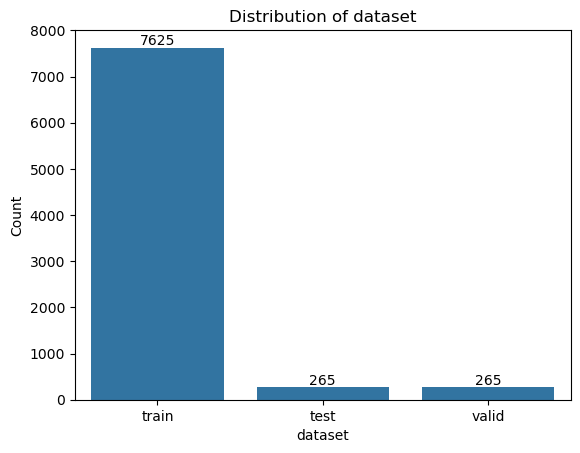

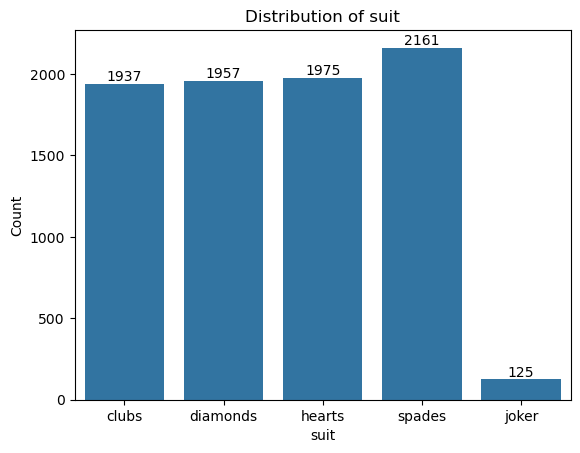

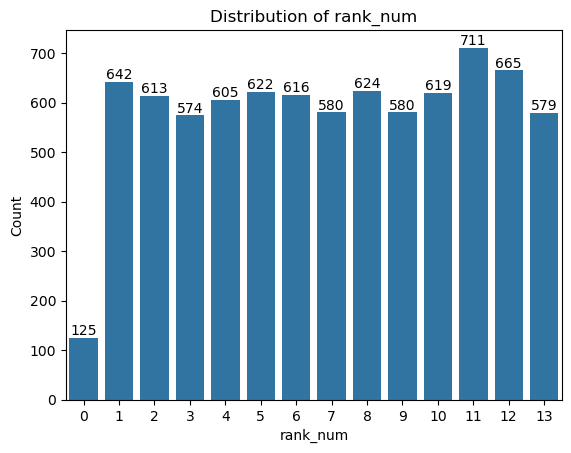

In [116]:
# distribution of data between train, test, valid
edaPlots(df, "dataset")

# distribution of data between suits & rank
edaPlots(df, "suit")
edaPlots(df, "rank_num")


##### Brightness Distributions

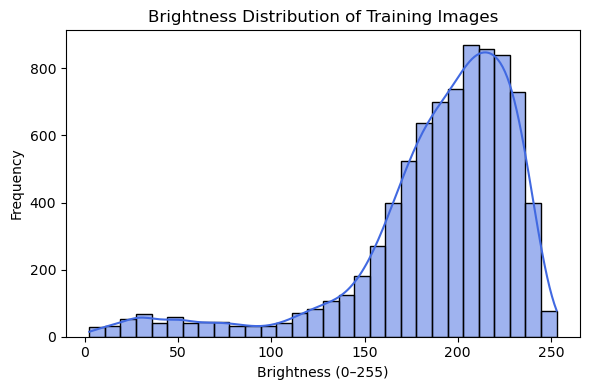

In [119]:
# brightness distribution among the images in data
plt.figure(figsize=(6,4))
sns.histplot(df["brightness"].dropna(), bins=30, kde=True, color="royalblue")
plt.title("Brightness Distribution of Training Images")
plt.xlabel("Brightness (0–255)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

/var/folders/jk/6kkcnpm5427114c5rqjh8k6c0000gn/T/ipykernel_9216/4256121949.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="suit", y="brightness", palette="plasma")


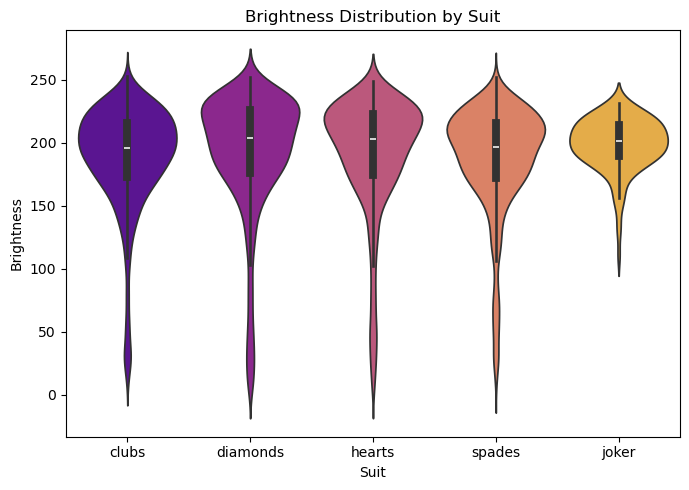

In [122]:
# brightness by suit
plt.figure(figsize=(7,5))
sns.violinplot(data=df, x="suit", y="brightness", palette="plasma")
plt.title("Brightness Distribution by Suit")
plt.xlabel("Suit")
plt.ylabel("Brightness")
plt.tight_layout()
plt.show()


/var/folders/jk/6kkcnpm5427114c5rqjh8k6c0000gn/T/ipykernel_9216/2595372011.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


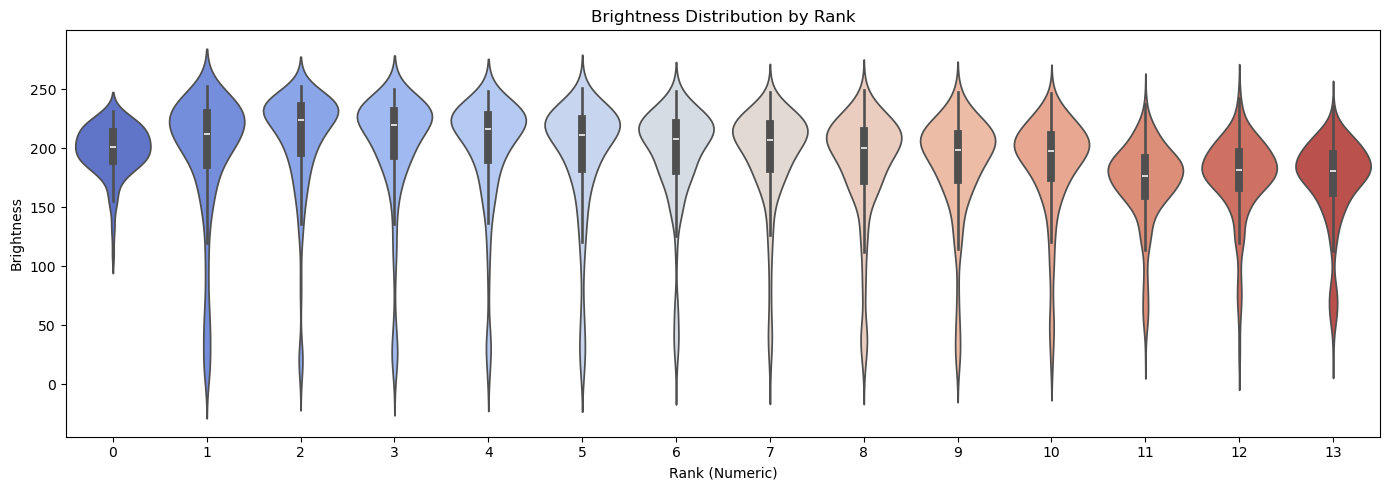

In [124]:
# brightness distribution by rank
plt.figure(figsize=(14,5))
sns.violinplot(
    data=df,
    x="rank_num",
    y="brightness",
    palette="coolwarm"
)
plt.title("Brightness Distribution by Rank")
plt.xlabel("Rank (Numeric)")
plt.ylabel("Brightness")
plt.tight_layout()
plt.show()

/var/folders/jk/6kkcnpm5427114c5rqjh8k6c0000gn/T/ipykernel_9216/2146047585.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
/var/folders/jk/6kkcnpm5427114c5rqjh8k6c0000gn/T/ipykernel_9216/2146047585.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


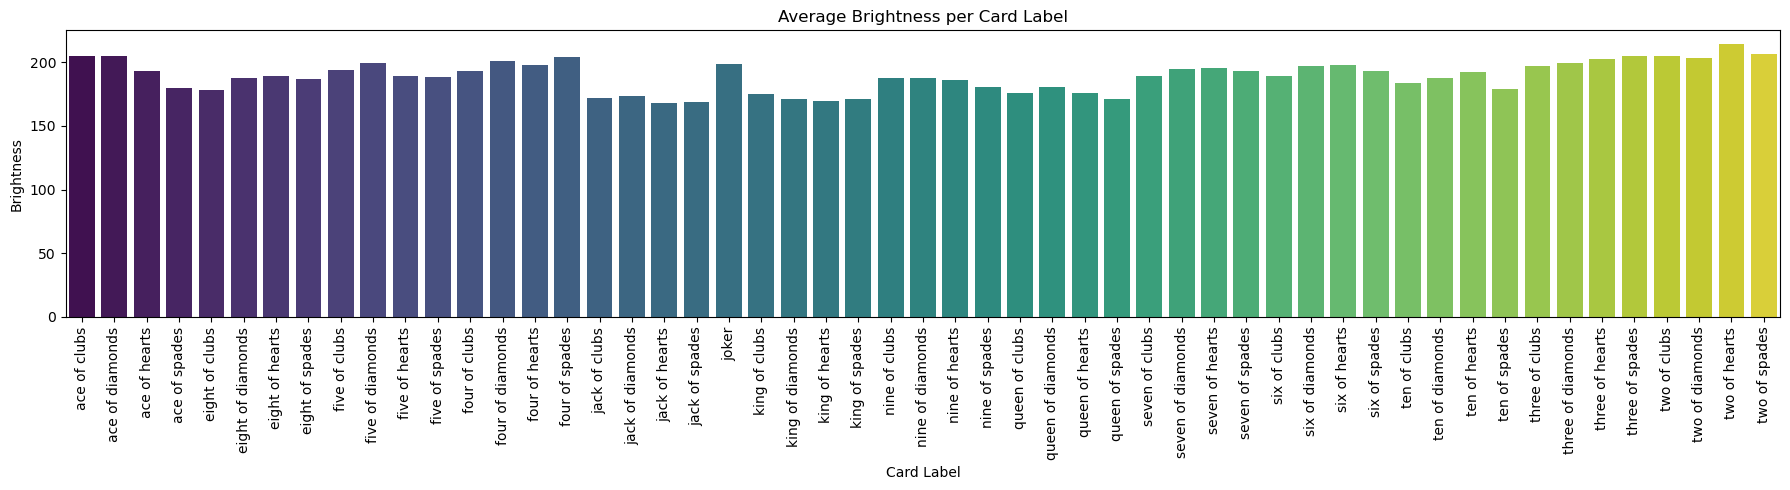

In [125]:
# brightness by cards
plt.figure(figsize=(18,5))
sns.barplot(
    data=df.sort_values("label"),
    x="label",
    y="brightness",
    ci=None,
    palette="viridis"
)
plt.xticks(rotation=90)
plt.title("Average Brightness per Card Label")
plt.xlabel("Card Label")
plt.ylabel("Brightness")
plt.tight_layout()
plt.show()

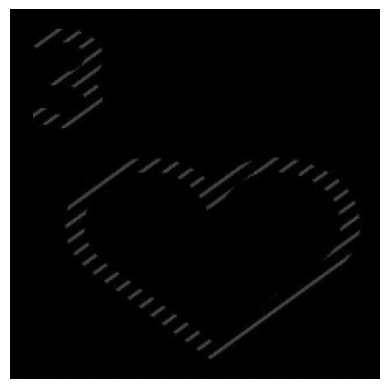

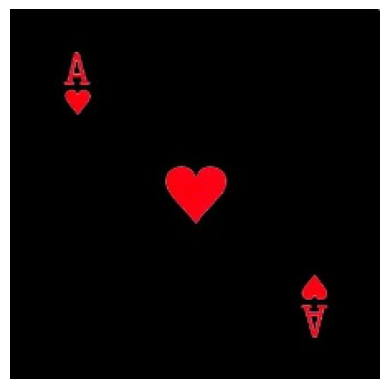

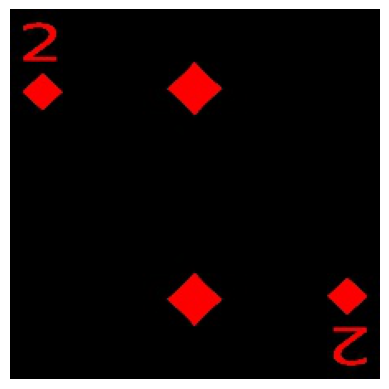

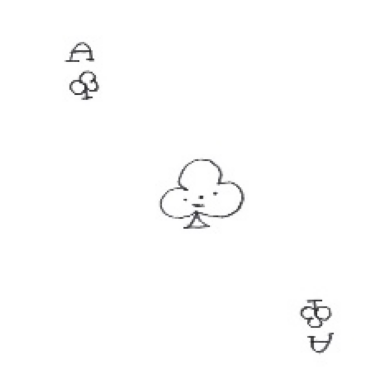

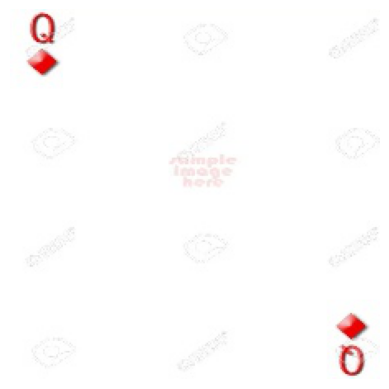

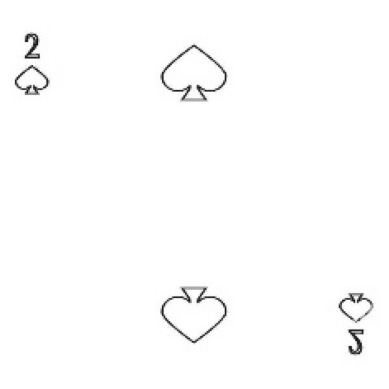

In [126]:
# identify darkest and brightest image
df.nsmallest(5, "brightness")[["file_path", "brightness", "label"]]
df.nlargest(5, "brightness")[["file_path", "brightness", "label"]]

def show_image(path):
    img = Image.open(path)
    plt.imshow(img)
    plt.axis("off")
    plt.show()

# Darkest
for p in df.nsmallest(3, "brightness")["file_path"]:
    show_image(p)

# Brightest
for p in df.nlargest(3, "brightness")["file_path"]:
    show_image(p)

#### EDA for Training Data

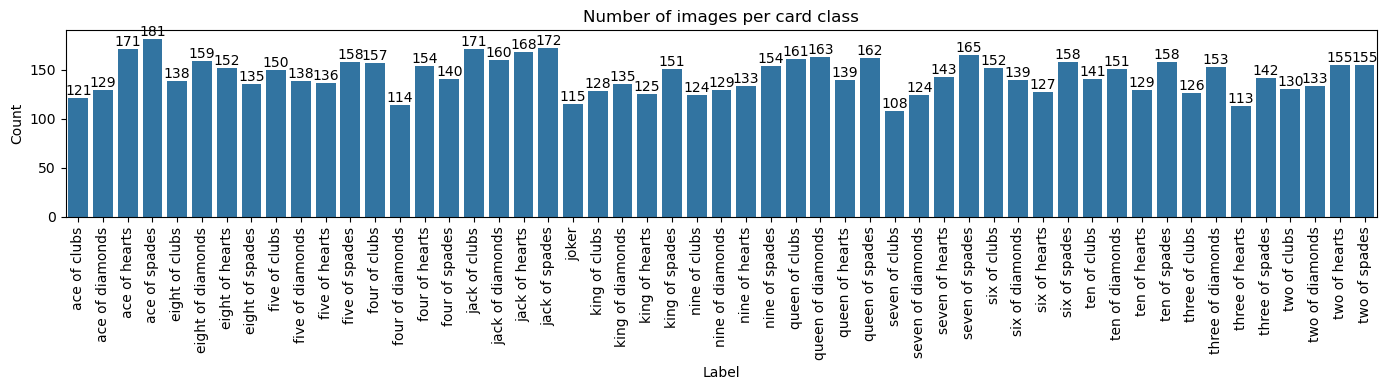

In [128]:
# class distribution
plt.figure(figsize=(14, 4))
ax = sns.countplot(
    data=df_train.sort_values("label"),
    x="label",
    order=sorted(df_train["label"].unique())
)
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.title("Number of images per card class")
plt.xlabel("Label")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

### Save csv file with new columns

In [ ]:
df.to_csv('./data/cards.csv', index=False)